# Basic Deep Learning - MNIST Fashion

Kita akan melatih jaringan NN untuk mengenali item pakaian dari dataset MNIST Fashion

https://github.com/zalandoresearch/fashion-mnist

Training set of 60,000 examples and a test set of 10,000 examples. Setiap item adalah gambar grayscale 28*28 pixel.

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

# A. Load Data

Data sudah tersedia di `tf.keras.datasets` API.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Check Sample Data

Kita akan cek seperti data yang telah kita miliki

Label 5
Data Image [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1
    1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0
    0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38
   99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146
  164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172
  146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71
    0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0

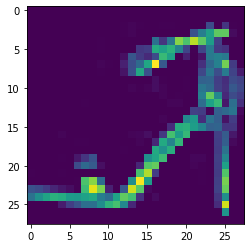

In [ ]:
import matplotlib.pyplot as plt

# cek sample data dengan index tertentu
# [0] merupakan index pada data, anda bisa ganti index ini

plt.imshow(training_images[8])

print('Label', training_labels[8])
print('Data Image', training_images[8])

Data asli terdiri antara angka 0 dan 255. Jika kita latih dengan jaringan NN, itu akan lebih mudah jika kita buat semua nilainya diantara 0 dan 1. 

Proses ini yang disebut sebagai 'normalisasi'.

Data Image [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.01176471 0.00392157 0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.22745098
  0.         0.15294118 0.00392157 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.    

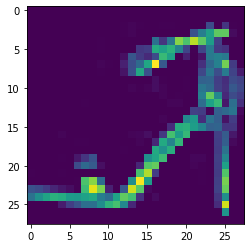

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

print('Data Image', training_images[8])
plt.imshow(training_images[8])

# B. Build the Model

In [ ]:
batch_size = 512

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print('\nSudah sampai akurasi 90%, stop training!')
      self.model.stop_training = True

callback = myCallback()

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

2.9.2


In [ ]:
%%time
history = model.fit(training_images,
                 training_labels,
                 epochs = 45,
                 steps_per_epoch = 100,
                 batch_size = 128,
                 verbose = 1,
                 callbacks = [callback])
#model.fit(training_images, training_labels, epochs=30, callbacks=[callback])

Epoch 1/45
100/100 [==============================] - 1s 5ms/step - loss: 0.8297 - accuracy: 0.7188
Epoch 2/45
100/100 [==============================] - 0s 4ms/step - loss: 0.5349 - accuracy: 0.8170
Epoch 3/45
100/100 [==============================] - 0s 4ms/step - loss: 0.4933 - accuracy: 0.8279
Epoch 4/45
100/100 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8433
Epoch 5/45
100/100 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.8465
Epoch 6/45
100/100 [==============================] - 0s 4ms/step - loss: 0.4128 - accuracy: 0.8595
Epoch 7/45
100/100 [==============================] - 0s 4ms/step - loss: 0.4111 - accuracy: 0.8542
Epoch 8/45
100/100 [==============================] - 0s 4ms/step - loss: 0.3982 - accuracy: 0.8601
Epoch 9/45
100/100 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.8602
Epoch 10/45
100/100 [==============================] - 0s 4ms/step - loss: 0.3848 - accuracy: 0.8658

<function matplotlib.pyplot.show(*args, **kw)>

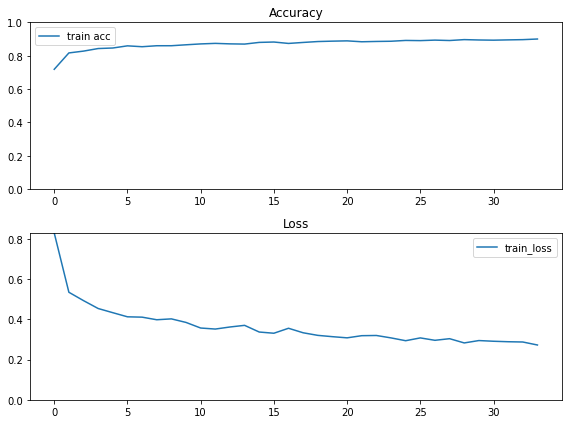

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (8,6))

ax[0].plot(history.history['accuracy'], label = 'train acc')
ax[0].legend()
ax[0].set_title('Accuracy')
ax[0].set_ylim(0, 1)

ax[1].plot(history.history['loss'], label = 'train_loss')
ax[1].legend()
ax[1].set_title('Loss')
ax[1].set_ylim([0,max(history.history['loss'])])

fig.tight_layout()
plt.show

# OLD CODE

In [ ]:
def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
X_train_orig, y_train_orig = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [ ]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

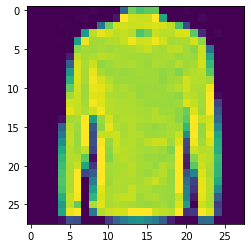

In [ ]:
plt.imshow(X_train[1, :].reshape((28, 28)))

In [ ]:
img_height, img_width = 128, 128

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
    rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    X_train, y_train,
    batch_size = 9,
    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
    X_val, y_val,
    batch_size = 9,
    class_mode = 'categorical')

ValueError: ignored

In [ ]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.95:
            print("\Akurasi sudah mencapai > 0.95!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [ ]:
# 2 layer NN

def CNN(lr = 0.001):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3),
                                  activation = 'relu',
                                  input_shape = (128, 128, 3)))
    model.add(keras.layers.MaxPooling2D(3,3))
    model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(keras.layers.MaxPooling2D(4,4))
    model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
    model.add(keras.layers.MaxPooling2D(3,3))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dense(32, activation = 'relu'))
    model.add(keras.layers.Dense(3, activation = 'softmax'))
    
    adam = keras.optimizers.Adam(learning_rate = lr)
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = adam,
                  metrics = ['acc'])
    
    return model

model = CNN(lr = 0.0008)
model.summary()


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))
history = model.fit(train_generator,
                 epochs = 45,
                 steps_per_epoch = 100,
                 batch_size = 128,
                 validation_data = val_generator,
                 verbose = 1,
                 callbacks = [callbacks])